# Analytic integration of C-CST element

We tried to do the computational implementation directly and failed 🥲. So we need to build the local matrices for our element analytically and use that as a reference to fix the numerical approach.

The element is a 9-node quadrilateral where the 9-nodes are used to interpolate the x and y displacements, the 4 nodes on the vertices are used to interpolate the rotation field and the element in the facet interpolates the skew-symmetric part of the force-stress tensor.

It is a slight variation from the element described in [Guarín Variational methods for Bloch analysis paper](https://arxiv.org/pdf/2106.08893)


In [1]:
from sympy import init_session

init_session()

IPython console for SymPy 1.12 (Python 3.11.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [3]:
E, rho = symbols('E rho', positive=True)
nu, r, s = symbols('nu r s')

Constitutive equations in Voigt's notation

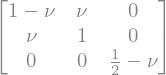

In [4]:
factor = E/((1+nu)*(1-2*nu))
factor = 1
C = factor*Matrix([
     [1 - nu,nu,0], 
     [nu,1,0], 
     [0,0,(1-2*nu)/2]])
display(C)

### 4 Nodes

Interpolation functions

    2-----1
    |     |
    |     |
    3-----4

In [5]:
N = S(1)/4*Matrix([(1 + r) * (1 + s),
                  (1 - r) * (1 + s),
                  (1 - r) * (1 - s),
                  (1 + r) * (1 - s)])

Interpolation matrix

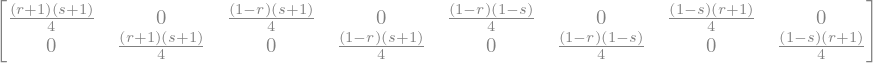

In [6]:
H = zeros(2, 8)
for i in range(4):
    H[0, 2*i] = N[i]
    H[1, 2*i + 1] = N[i]

display(H)

Mass matrix

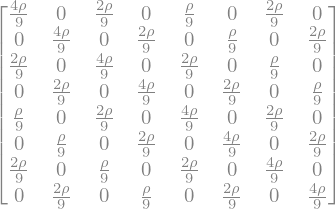

In [7]:
M_inte = H.T * H
M = integrate(integrate(rho*M_inte, [r, -1, 1]), [s, -1, 1])
display(M)

Derivatives interpolation matrix

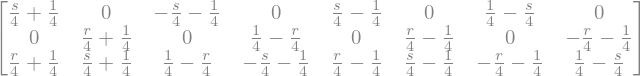

In [8]:
B = zeros(3, 8)
for i in range(4):
    B[0, 2*i] = diff(N[i], r)
    B[1, 2*i + 1] = diff(N[i], s)
    B[2, 2*i] = diff(N[i], s)
    B[2, 2*i + 1] = diff(N[i], r)

display(B)

Stiffness matrix

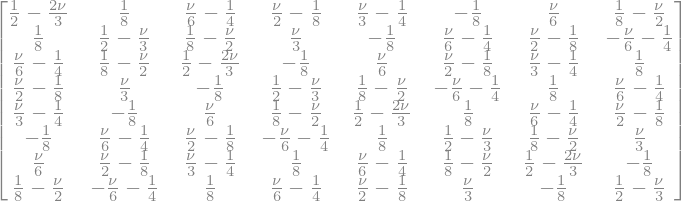

In [9]:
K_inte = B.T * C * B
K = simplify(integrate(integrate(K_inte, [r, -1, 1]), [s, -1, 1]))
display(K)

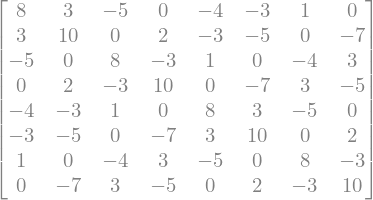

In [12]:
display(24*K.subs(nu, S(1)/4))